# CSE 572: Lab 15

Clustering techniques can be divided into partitional vs. hierarchical strategies. Partitional strategies divide the input space into non-overlapping partitions or subsets. Hierarchical strategies create nested clusters or subsets of points. The two main types of hierarchical clustering strategies are:
1. agglomerative, in which clusters are iteratively merged; and 
2. divisive, in which clusters are iteratively split. 

In this lab, you will practice implementing agglomerative hierarchical clustering techniques.

To execute and make changes to this notebook, click File > Save a copy to save your own version in your Google Drive or Github. Read the step-by-step instructions below carefully. To execute the code, click on each cell below and press the SHIFT-ENTER keys simultaneously or by clicking the Play button. 

When you finish executing all code/exercises, save your notebook then download a copy (.ipynb file). Submit the following **three** things:
1. a link to your Colab notebook,
2. the .ipynb file, and
3. a pdf of the executed notebook on Canvas.

To generate a pdf of the notebook, click File > Print > Save as PDF.

## Agglomerative hierarchical clustering

This section demonstrates examples of applying hierarchical clustering to the vertebrate dataset used in Lab 4. Specifically, we illustrate the results of using 3 hierarchical clustering algorithms provided by the Python scipy library: (1) single link (MIN), (2) complete link (MAX), and (3) group average. Other hierarchical clustering algorithms provided by the library include centroid-based and Ward's method.

In [ ]:
# Set the random seed
import numpy as np
np.random.seed(0)

### Load the dataset

The vertebrate dataset we will use in this lab consists of samples containing information about vertebrates. Each vertebrate is classified into one of 5 categories: mammals, reptiles, birds, fishes, and amphibians, based on a set of explanatory attributes (predictor variables). Except for "name", the rest of the attributes have been converted into a  binary representation. 

In [ ]:
import pandas as pd

data = pd.read_csv('https://docs.google.com/uc?export=download&id=1DrqbYx-0E8qdHexxO7m9fo11444pz5v5', header='infer')
data

,Name,Warm-blooded,Gives Birth,Aquatic Creature,Aerial Creature,Has Legs,Hibernates,Class
0,human,1,1,0,0,1,0,mammals
1,python,0,0,0,0,0,1,reptiles
2,salmon,0,0,1,0,0,0,fishes
3,whale,1,1,1,0,0,0,mammals
4,frog,0,0,1,0,1,1,amphibians
5,komodo,0,0,0,0,1,0,reptiles
6,bat,1,1,0,1,1,1,mammals
7,pigeon,1,0,0,1,1,0,birds
8,cat,1,1,0,0,1,0,mammals
9,leopard shark,0,1,1,0,0,0,fishes


In [ ]:
names = data['Name']
Y = data['Class']
X = data.drop(['Name','Class'],axis=1)

### Single link (MIN) algorithm

The single link algorithm, also known as MIN, decides which clusters to merge by choosing the clusters with the smallest distance between any point from each of two clusters.

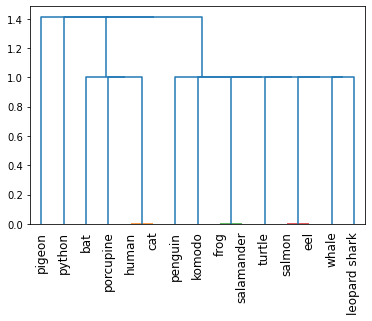

In [ ]:
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt

Z = hierarchy.linkage(X, 'single')
dn = hierarchy.dendrogram(Z, labels=names.tolist(), orientation='top', leaf_rotation=90)

**Question 1: What do the values on the x axis of the above dendrogram represent?**

**Answer:**

X axis has the names of the animals that can be categorised together.

### Complete link (MAX) algorithm

The complete link algorithm, also known as MAX, decides which clusters to merge by choosing the clusters with the smallest distance between the *farthest* pair of points from each of two clusters.

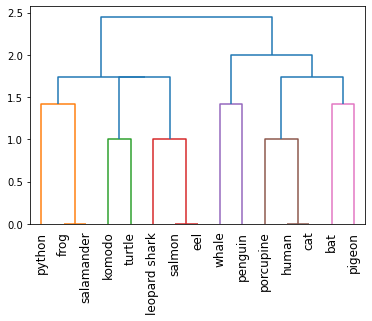

In [ ]:
Z = hierarchy.linkage(X, 'complete')
dn = hierarchy.dendrogram(Z, labels=names.tolist(), orientation='top', leaf_rotation=90)

### Group average algorithm

**Question 2: How does the group average algorithm decide which clusters to merge?**

**Answer:**

Here we combine the two clusters that have the smallest average distance between clusters.

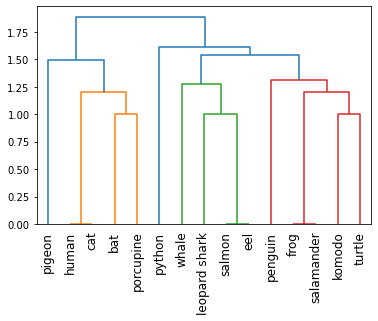

In [ ]:
Z = hierarchy.linkage(X, 'average')
dn = hierarchy.dendrogram(Z, labels=names.tolist(), orientation='top', leaf_rotation=90)

### Ward's algorithm

Ward's algorithm determines which clusters to merge based on the minimum increase in SSE resulting from merging a pair of clusters.

Read the documentation for hierarchical clustering in scipy to figure out how to cluster `X` using Ward's method and plot the corresponding dendrogram.

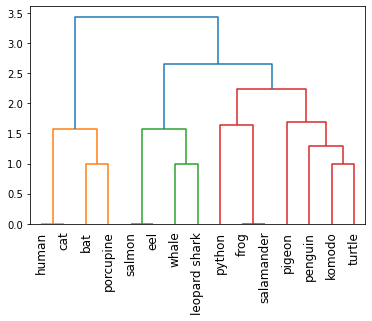

In [ ]:
# YOUR CODE HERE
Z = hierarchy.linkage(X, 'ward')
dn = hierarchy.dendrogram(Z, labels=names.tolist(), orientation='top', leaf_rotation=90)

## Density-Based Clustering

Density-based clustering identifies the individual clusters as high-density regions that are separated by regions of low density. DBSCAN is one of the most popular density based clustering algorithms. In DBSCAN, data points are classified into 3 types---core points, border points, and noise points---based on the density of their local neighborhood. The local neighborhood density is defined according to 2 parameters:  radius of neighborhood size (eps) and minimum number of points in the neighborhood (min_samples). 

For this approach, we will use a noisy, 2-dimensional dataset originally created by Karypis et al. [1] for evaluating their proposed CHAMELEON algorithm. The example code shown below will load and plot the distribution of the data.

[1] George Karypis, Eui-Hong Han, and Vipin Kumar. CHAMELEON: A Hierarchical Clustering Algorithm Using Dynamic Modeling. IEEE Computer 32(8): 68-75, 1999.

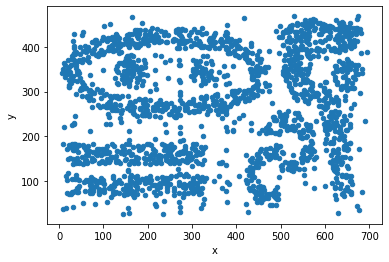

In [ ]:
data = pd.read_csv('https://docs.google.com/uc?export=download&id=1GQNjiri37By8OzPEaETUfDGQhekjE82Z', 
                   delimiter=' ',
                   names=['x', 'y'],
                   on_bad_lines='skip')

data.plot.scatter(x='x',y='y')

We apply the DBSCAN clustering algorithm on the data by setting the neighborhood radius (eps) to 15.5 and minimum number of points (min_samples) to be 5. The noise points are assigned to a cluster ID equal to -1 while the cluster IDs containing core points range from 0 to $k$ where $k$ is the number of resulting clusters.

In [ ]:
from sklearn.cluster import DBSCAN

# Create a DBSCAN model instance and fit it to our data
db = DBSCAN(eps=15.5, min_samples=5).fit(data)

# Create a pandas dataframe to store the resulting cluster IDs
clusters = pd.DataFrame(db.labels_, columns=['Cluster ID'])

# Combine the data and resulting clusters into one dataframe
results = pd.concat((data, clusters), axis=1)

results

,x,y,Cluster ID
0,650.914,214.888,4
1,41.767,179.408,0
2,509.126,233.749,1
3,486.403,152.427,2
4,46.883,367.904,3
...,...,...,...
1966,631.430,210.478,4
1967,187.652,247.923,3
1968,124.996,264.847,3
1969,522.511,302.785,4


Plot the dataset with points colored by their cluster ID (including noise points).

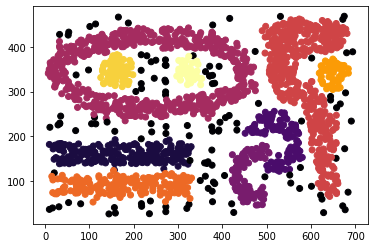

In [ ]:
# YOUR CODE HERE
import matplotlib.pyplot as plt

plt.scatter(results.x,results.y,c=results['Cluster ID'],cmap='inferno')

In [ ]:
clusters.value_counts()

Cluster ID
 3            560
 4            450
 0            229
 5            203
 1            127
-1            125
 2            109
 7             72
 6             55
 8             41
dtype: int64

In the cells below, use K-means to cluster the dataset. Set $k$ to be the same number of clusters found by DBSCAN. Use the default initialization for centroids (kmeans++).

In [ ]:
# YOUR CODE HERE
from sklearn.cluster import KMeans

n_clusters = 9

kp_means = KMeans(n_clusters=n_clusters, init='k-means++', n_init=1, random_state=0)
kp_means.fit(data)
kp_clusters = kp_means.labels_

Next, plot the dataset colored by their cluster IDs chosen by K-means.

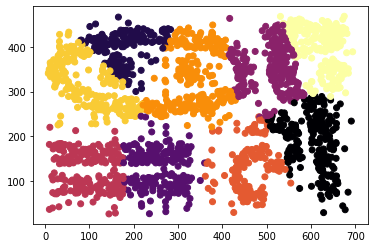

In [ ]:
# YOUR CODE HERE
import matplotlib.pyplot as plt

plt.scatter(data.x,data.y,c=kp_clusters,cmap='inferno')

**Question 3: Which clustering algorithm (DBSCAN or K-means) resulted in a more optimal clustering for this dataset?**

**Answer:**

DBScan clustering gave more optimal clustering